##### Python for High School (Winter 2022)

* [Table of Contents](PY4HS.ipynb)
* <a href="https://colab.research.google.com/github/4dsolutions/elite_school/blob/master/Py4HS_Bernoulli.ipynb"><img align="left" src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open in Colab" title="Open and Execute in Google Colaboratory"></a>
* [![nbviewer](https://raw.githubusercontent.com/jupyter/design/master/logos/Badges/nbviewer_badge.svg)](https://nbviewer.org/github/4dsolutions/elite_school/blob/master/Py4HS_Bernoulli.ipynb)

# Polynomials with Bernoulli Numbers

This Notebook was developed after our Summer 2022 virtual classroom, a not for credit enrichment experience.  Earlier in 2022, I served as an 8th grade teacher in a for-credit program, for 1.5 semesters.

As of that time, I had not yet done much with Taylor and Maclaurin Expansions, in terms of Notebooks.  Other teachers were going there for sure.  

I was aiming for some more exotic and/or esoteric topics (this being summer school enrichment), i.e. material non-redundant with topics ordinarily included in a typical college prep high school curriculum, in that day and age.

An historical approach based on the Bernoulli family as a hub, based in Switzerland, came to me later.  I started exploring the ramifications by leveraging Bernoulli numbers as a topic, which connect us back to Pascal's Triangle, already a "grand central station" in our global grid.

These explorations came in conjunction with a certain [Math for Wisdom (M4W)](https://www.math4wisdom.com/) project, managed by one Andrius Kulikauskas in Lithuania.

In [1]:
import sympy as sp
import numpy as np
import pandas as pd

In [2]:
from IPython.display import YouTubeVideo

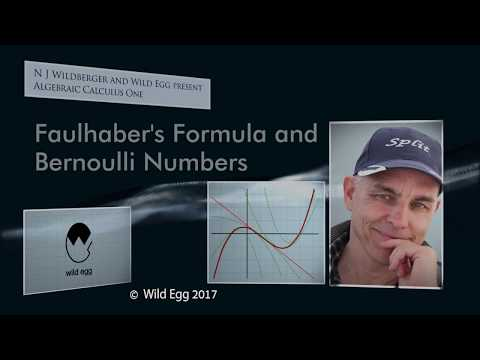

In [3]:
YouTubeVideo("jx_JR5xD9Ko")

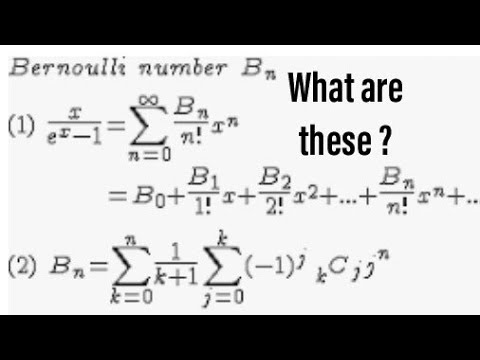

In [4]:
YouTubeVideo("s6-lN62Q_z8")

Consider the expression below.  How many consecutive numbers, starting with 1, you want to sum, is your n.  What power you wish to raise them all to is your m.

In [5]:
m = 3    # n = 10
(   1 ** m 
 +  2 ** m 
 +  3 ** m 
 +  4 ** m 
 +  5 ** m 
 +  6 ** m 
 +  7 ** m 
 +  8 ** m 
 +  9 ** m  
 + 10 ** m)

3025

In [6]:
m, n, i = sp.symbols(['m','n', 'i'])

Here's a way of writing the same expression, leaving the values of m and n open ended.  We will substitute actual values below.

In [7]:
the_sum = sp.summation(i ** m, (i, 1, n))
the_sum

Sum(i**m, (i, 1, n))

Evaluate the above summation with 10 terms (1,2.. 10) each raised to the 3rd power.  If you have this as a live Notebook, say in Collab, this is your chance to play around with other values.

In [8]:
the_sum.evalf(subs={n:10, m:3})

3025.00000000000

Numpy lets us compute this sum in an even more compact form, given raising each of n terms to the mth power may be accomplished in a single line of code.

In [9]:
def exp_sum(m, n):
    return np.sum( np.arange(1, n+1) ** m)

In [10]:
exp_sum(3, 10)

3025

In [11]:
exp_sum(5, 10)

220825

Now the Bernoulli Numbers enter the picture.  We're going to transform our expression for the sum of n consecutive integers starting with 1, to the mth power, into a polynomial of m+1 terms, and n the value of some variable x.  

The more consecutive integers you want, the higher the x you put in, to an already computed polynomial of m+1 terms with fixed coefficients.  What fixed coefficients?  The Bernoulli Numbers will go into their defintion (computation).

In [12]:
n = 20
Bs = [sp.bernoulli(i) for i in range(0, n+1)]

In [13]:
Bernoulli = pd.DataFrame({'Bernoulli':Bs})
Bernoulli

,Bernoulli
0,1
1,-1/2
2,1/6
3,0
4,-1/30
5,0
6,1/42
7,0
8,-1/30
9,0


In [14]:
from scipy.special import comb

def exp_sum_2(m, n):
    n = n + 1
    total = 0
    for k in range(0, m+1):
        term = comb(m+1, k, exact=True) * sp.bernoulli(k) * n**(m-k+1)
        total += term
    return total/(m+1)

In [15]:
exp_sum_2(3, 10)  # new way

3025

In [16]:
exp_sum(3, 10)    # old way

3025

In [17]:
exp_sum_2(5, 10)  # new way

220825

In [18]:
exp_sum(5, 10)    # old way

220825

# Bernoulli Polynomials

The section above followed an well trod path, whereas I'm more randomly exploring in the cells below.  As I discuss in one of my YouTubes, my objective is to be suggestive, and to demonstrate the relevance of a particular toolset, namely Jupyter + pandas + sympy + numpy.  In past chapters, I did a lot more with VPython, and lets not forget Blender.  In this Python for High School implementation, I dive into Python + POV-Ray quite a bit, a theme for me since the 1990s.

That "generating function" and "generator function" appear to be the same concept is somewhat fortuitous I'd say, as the "generator function" in Python is well adapted to yielding successive members of infinite sequences, which is what "generating functions" also do, using sigma notation and/or, if they converge, the imprimatur of their limiting curve.

For example, the exponential curve below may be described using an infinite series defined as a polynomial, with Bernoulli numbers playing a role in generating the coefficients, just as we saw above in connection with defining the sum of consecutive integers to an natural number power.

See: [CP4E; Numeracy Series](http://4dsolutions.net/ocn/numeracy0.html)

In [19]:
t, x = sp.symbols(['t', 'x'])

In [20]:
t = 2
f = t * sp.E**(x*t)/(sp.E**t - 1)
f

2*exp(2*x)/(-1 + exp(2))

In [21]:
f.evalf()

0.313035285499331*exp(2*x)

In [22]:
domain = np.linspace(2, 5, 40)
domain

array([2.        , 2.07692308, 2.15384615, 2.23076923, 2.30769231,
       2.38461538, 2.46153846, 2.53846154, 2.61538462, 2.69230769,
       2.76923077, 2.84615385, 2.92307692, 3.        , 3.07692308,
       3.15384615, 3.23076923, 3.30769231, 3.38461538, 3.46153846,
       3.53846154, 3.61538462, 3.69230769, 3.76923077, 3.84615385,
       3.92307692, 4.        , 4.07692308, 4.15384615, 4.23076923,
       4.30769231, 4.38461538, 4.46153846, 4.53846154, 4.61538462,
       4.69230769, 4.76923077, 4.84615385, 4.92307692, 5.        ])

In [23]:
F = sp.lambdify(x, f, "numpy")

In [24]:
F

<function _lambdifygenerated(x)>

In [25]:
F(domain)

array([  17.09114748,   19.93360084,   23.24878671,   27.11532592,
         31.62491483,   36.88449997,   43.01881428,   50.17333525,
         58.51773491,   68.2499037 ,   79.60064349,   92.83914117,
        108.27935247,  126.28744755,  147.29049486,  171.78658923,
        200.35666433,  233.67826978,  272.54163943,  317.86843206,
        370.73358887,  432.39082605,  504.30236717,  588.17362027,
        685.99362229,  800.08220976,  933.14503454, 1088.33772937,
       1269.34074484, 1480.44663253, 1726.66184449, 2013.82546301,
       2348.74767657, 2739.3712859 , 3194.96007037, 3726.31848185,
       4346.04787612, 5068.84535865, 5911.85233164, 6895.06100862])

In [26]:
df = pd.DataFrame({"the_domain": domain,
                   "the_range" : F(domain)})
df

,the_domain,the_range
0,2.000000,17.091147
1,2.076923,19.933601
2,2.153846,23.248787
3,2.230769,27.115326
4,2.307692,31.624915
5,2.384615,36.884500
6,2.461538,43.018814
7,2.538462,50.173335
8,2.615385,58.517735
9,2.692308,68.249904


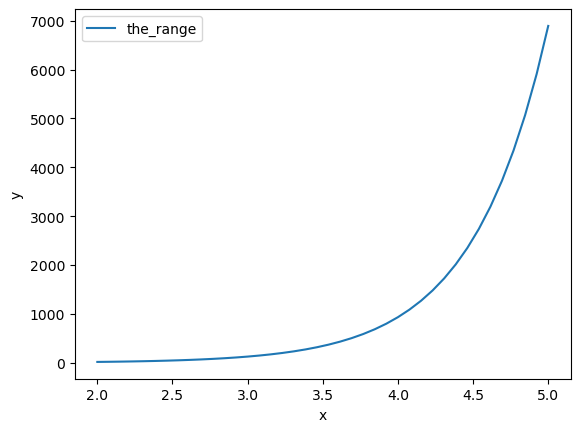

In [27]:
df.plot(x="the_domain", xlabel="x", ylabel="y");

In [28]:
def terms():
    n = 0
    while True:
        yield x**n/sp.factorial(n) * sp.bernoulli(n)
        n += 1

In [29]:
gen_coeffs = terms()

In [30]:
poly_coeffs = [next(gen_coeffs) for _ in range(17)]
poly_coeffs

[1,
 -x/2,
 x**2/12,
 0,
 -x**4/720,
 0,
 x**6/30240,
 0,
 -x**8/1209600,
 0,
 x**10/47900160,
 0,
 -691*x**12/1307674368000,
 0,
 x**14/74724249600,
 0,
 -3617*x**16/10670622842880000]

In [31]:
expr = sum(poly_coeffs)  # we will lambdify and plot this below
expr

-3617*x**16/10670622842880000 + x**14/74724249600 - 691*x**12/1307674368000 + x**10/47900160 - x**8/1209600 + x**6/30240 - x**4/720 + x**2/12 - x/2 + 1

In [32]:
expr.subs(x, 1/3)

0.842575491052376

In [33]:
expr2 = x/(sp.E**x - 1)  # we will lambdify and plot this below, comparing with the above
expr2

x/(exp(x) - 1)

In [34]:
expr2.subs(x, 1/3)

0.842575491052376

In [35]:
expr.subs(x, 1).evalf()

0.581976706869318

In [36]:
expr2.subs(x, 1).evalf()

0.581976706869326

In [37]:
B = sp.lambdify(x, expr, "numpy")

In [38]:
E = sp.lambdify(x, expr2)

In [39]:
df = pd.DataFrame({"the_domain": domain,
                   "exponential" : E(domain),
                   "polynomial": B(domain)})
df

,the_domain,exponential,polynomial
0,2.000000,0.313035,0.313035
1,2.076923,0.297559,0.297559
2,2.153846,0.282733,0.282733
3,2.230769,0.268540,0.268540
4,2.307692,0.254960,0.254960
5,2.384615,0.241973,0.241973
6,2.461538,0.229560,0.229560
7,2.538462,0.217703,0.217703
8,2.615385,0.206383,0.206383
9,2.692308,0.195581,0.195580


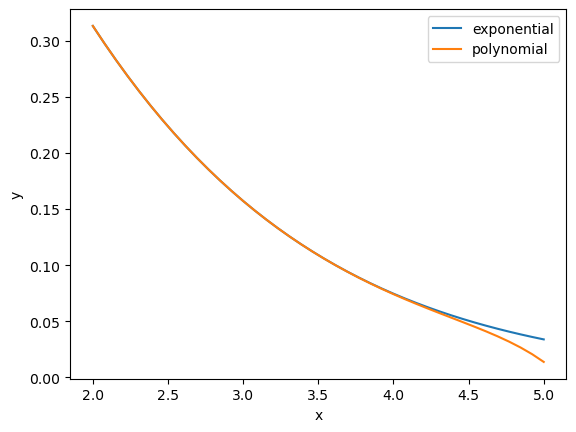

In [40]:
df.plot(x="the_domain", xlabel="x", ylabel="y");